In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# Importing the data
housing = pd.read_csv('All_Data.csv')

In [3]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Prop_Addr
0,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,3126 NORTHWOOD DR
1,526302030,1293,149900,20,RL,NaN,11027,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,3115 NORTHWOOD DR
2,526302040,1024,157500,20,RL,85.0,10533,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,3113 NORTHWOOD DR
3,526302110,882,124500,20,RL,74.0,13008,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,623 RIVER OAK DR
4,526302120,1797,169000,20,RL,NaN,11765,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,627 RIVER OAK DR


array([[<AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'BsmtFullBath'}>

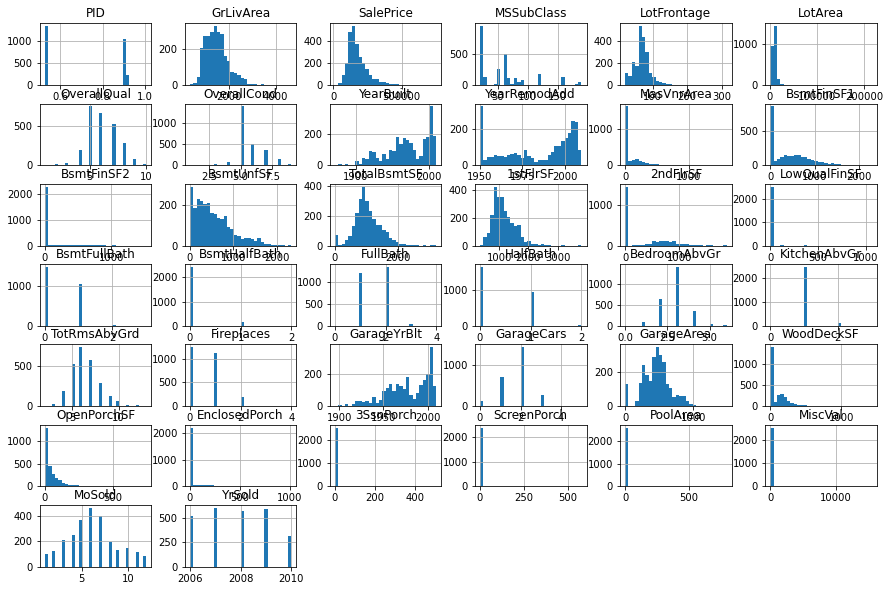

In [5]:
housing.hist(bins = 30, figsize= (15,10))

In [19]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [86]:
missingRows = housing.isnull().any(axis=1)
missingRows.sum()

2579

In [30]:
missingCols = housing.isnull().any(axis=0)

In [10]:
print('The columns with missingness are %s' %(housing.columns[missingCols]))

The columns with missingness are Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Prop_Addr'],
      dtype='object')


In [82]:
num_missing = housing.isnull().sum()
num_missing = zip(num_missing.index, num_missing.values)
missing_df = pd.DataFrame([[x,y] for (x,y) in num_missing if y != 0])
missing_df = missing_df.rename(columns={0:'Feature',1:'Count'})
fig = px.bar(missing_df, 
             x = 'Count', 
             y = 'Feature', 
             color = 'Feature',
             orientation = 'h',
             height=600,
             title='Number of Missing Values by Feature').update_yaxes(categoryorder='total ascending')
fig.show()